In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk 

#read in data

df = pd.read_csv('Restaurant Reviews.csv')

df.head() #head command for data set

,Id,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,1.0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,2.0,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,3.0,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,4.0,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,5.0,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [12]:
df['Review'].values[0] #prints the first review only

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [13]:
print(df.shape) #prints the size of the dataset (20491 reviews, and 2 columns (reviews and ratings))

(10000, 8)


In [14]:
df = df.head(101)
print(df.shape)

(101, 8)


In [15]:
df['Rating'] #gives the rating column only

0      5
1      5
2      5
3      5
4      5
      ..
96     5
97     5
98     2
99     4
100    5
Name: Rating, Length: 101, dtype: object

In [16]:
df['Rating'].value_counts() #tells which rating number has occured how many times

5    67
4    16
1     8
3     6
2     4
Name: Rating, dtype: int64

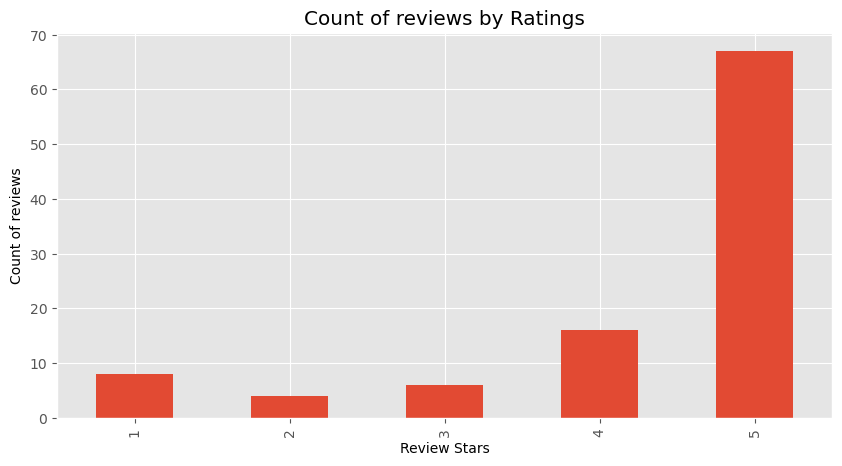

In [17]:
ax = df['Rating'].value_counts().sort_index().plot(kind= 'bar', title= 'Count of reviews by Ratings', figsize=(10,5))
# sort_index sorts the Ratings count by index
# plot function plots the graph
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count of reviews')
plt.show()

In [18]:
# BASIC NLTK STUFF

example = df['Review'][1]
print(example)

Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service


In [19]:
# BASIC NLTK STUFF CONTINUATION

#nltk.download('punkt')
token = nltk.word_tokenize(example)
token[:10] #prints the first 10 words only.

['Ambience',
 'is',
 'too',
 'good',
 'for',
 'a',
 'pleasant',
 'evening',
 '.',
 'Service']

In [20]:
# BASIC NLTK STUFF CONTINUATION

#nltk.download('averaged_perceptron_tagger')
## https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk      (THIS HAS LIST OF ABBREVIATIONS)
tagged = nltk.pos_tag(token) #find the part of speech for each word
tagged[:10]

[('Ambience', 'NN'),
 ('is', 'VBZ'),
 ('too', 'RB'),
 ('good', 'JJ'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('evening', 'NN'),
 ('.', '.'),
 ('Service', 'NNP')]

In [21]:
# BASIC NLTK STUFF CONTINUATION

# nltk.download('maxent_ne_chunker')
# nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  (GPE Ambience/NN)
  is/VBZ
  too/RB
  good/JJ
  for/IN
  a/DT
  pleasant/JJ
  evening/NN
  ./.
  Service/NNP
  is/VBZ
  very/RB
  prompt/JJ
  ./.
  (PERSON Food/NNP)
  is/VBZ
  good/JJ
  ./.
  Over/IN
  all/PDT
  a/DT
  good/JJ
  experience/NN
  ./.
  (PERSON Soumen/NNP Das/NNP)
  -/:
  kudos/NN
  to/TO
  the/DT
  service/NN)


In [22]:
#VADER SENTIMENT SCORING 


#VADER (VALENCE AWARE DICTIONARY AND SENTIMENT REASONER) - BAG OF WORDS APPROACH
#THIS APPROACH DOES NOT ACCOUNT FOR RELATIONSHIPS BETWEEN WORDS WHICH IN HUMAN SPEECH IS IMPORTANT
#STOP WORDS ARE WORDS LIKE AND/OR (WORDS THAT DO NOT HAVE A POSITIVE OR NEGATIVE FEELING)

#WE WILL USE NLTK'S SENTIMENT_INTENSITY_ANALYZER TO GET THE NEG/NEU/POS SCORES OF THE TEXT
#THIS USES A "BAG OF WORDS" APPROACH, STOP WORDS ARE REMOVED AND EACH WORD IS SCORED AND COMBINED TO A TOTAL SCORE

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

In [23]:
#VADER SENTIMENT SCORING CONTINUATION

sia.polarity_scores('I am  happy') #CHECK FOR EXAMPLE
#COMPOUND VALUE RANGES FROM -1 TO +1 
#TOWARDS -1 BEING THE MOST NEGATIVE, AND +1 TOWARDS MOST POSITIVE

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [24]:
#VADER SENTIMENT SCORING CONTINUATION

sia.polarity_scores('I am not happy') #CHECK FOR EXAMPLE

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

In [25]:
#VADER SENTIMENT SCORING CONTINUATION

sia.polarity_scores('I am not happy but not sad either') #CHECK FOR EXAMPLE

{'neg': 0.194, 'neu': 0.484, 'pos': 0.322, 'compound': 0.3252}

In [26]:
#VADER SENTIMENT SCORING CONTINUATION

example #PRINTS THE EXAMPLE THAT WE CHOSE EARLIER

'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service'

In [27]:
#VADER SENTIMENT SCORING CONTINUATION

sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.936}

In [28]:
#VADER SENTIMENT SCORING CONTINUATION

#RUN THE POLARITY SCORE ON THE ENTIRE DATASET

result = {} #DICTIONARY TO STORE THE POLARITY SCORES.

for i, row in tqdm(df.iterrows(), total = len(df)):
    rev = row['Review']
    myID = row['Id']
    result[myID] = sia.polarity_scores(rev) #IF YOU UNCOMMENT THE BELOW CODE, THEN COMMENT OUT THIS LINE

    #IF YOU WANT TO DISPLAY RESTAURANT NAMES, UNCOMMENT THE BELOW CODE
    #restaurant_name = row['Restaurant']
    #scores = sia.polarity_scores(rev) 
    #scores['Restaurant'] = restaurant_name
    #result[myID] = scores

#USE COMPOUND SCORES ONLY WITH INDEX NUMBER (MOEEN)


  0%|          | 0/101 [00:00<?, ?it/s]

In [29]:
#VADER SENTIMENT SCORING CONTINUATION

result

{1.0: {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9664},
 2.0: {'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.936},
 3.0: {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9186},
 4.0: {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.8591},
 5.0: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9201},
 6.0: {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.9565},
 7.0: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.7264},
 8.0: {'neg': 0.085, 'neu': 0.775, 'pos': 0.14, 'compound': 0.2329},
 9.0: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.9638},
 10.0: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9831},
 11.0: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9359},
 12.0: {'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.9737},
 13.0: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.8976},
 14.0: {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.7964},
 15.0: {'neg': 0.154, 'neu': 0.776, 'pos': 

In [52]:
#VADER SENTIMENT SCORING CONTINUATION

#store into pandas dataframe for an organized order.

vaders = pd.DataFrame(result).T  #.T flips the whole table.
vaders

,vader_neg,vader_neu,vader_pos,vader_compound,roberta negative,roberta_neutral,roberta_positive
1.0,0.000,0.582,0.418,0.9664,0.001391,0.015604,0.983005
2.0,0.000,0.554,0.446,0.9360,0.004032,0.031369,0.964600
3.0,0.000,0.692,0.308,0.9186,0.001272,0.008726,0.990003
4.0,0.000,0.708,0.292,0.8591,0.002306,0.022427,0.975267
5.0,0.000,0.609,0.391,0.9201,0.001360,0.009718,0.988923
...,...,...,...,...,...,...,...
97.0,0.000,0.738,0.262,0.8832,0.002469,0.010396,0.987135
98.0,0.000,0.873,0.127,0.6369,0.016086,0.089486,0.894428
99.0,0.346,0.654,0.000,-0.9137,0.974037,0.023381,0.002582
100.0,0.000,1.000,0.000,0.0000,0.001812,0.015618,0.982569


In [31]:
#VADER SENTIMENT SCORING CONTINUATION

vaders = vaders.reset_index().rename(columns={'index': 'Id'}) #merge it onto our original data frame
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,1.0,0.000,0.582,0.418,0.9664,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,2.0,0.000,0.554,0.446,0.9360,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,3.0,0.000,0.692,0.308,0.9186,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,4.0,0.000,0.708,0.292,0.8591,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,5.0,0.000,0.609,0.391,0.9201,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,97.0,0.000,0.738,0.262,0.8832,Beyond Flavours,Kailash Sain,I really enjoyed the follows....\nThe entrance...,5,1 Review,05-03-19 20:10,0
97,98.0,0.000,0.873,0.127,0.6369,Beyond Flavours,KAILASH SAIN,I came first time in this restaurant.\nThe ent...,5,1 Review,05-03-19 20:06,0
98,99.0,0.346,0.654,0.000,-0.9137,Beyond Flavours,Yaswanth Chowdary,Pathetic and horrible experience\nAmbience and...,2,"4 Reviews , 56 Followers",05-03-19 11:40,0
99,100.0,0.000,1.000,0.000,0.0000,Beyond Flavours,Aditya,Ahmed was serving us. Polite and very cooperat...,4,"4 Reviews , 46 Followers",05-02-19 23:28,1


In [32]:
#VADER SENTIMENT SCORING CONTINUATION

#NOW WE HAVE THE SENTIMENT SCORES AND THE METADATA.
vaders.head()

,Id,neg,neu,pos,compound,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,1.0,0.0,0.582,0.418,0.9664,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,2.0,0.0,0.554,0.446,0.9360,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,3.0,0.0,0.692,0.308,0.9186,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,4.0,0.0,0.708,0.292,0.8591,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,5.0,0.0,0.609,0.391,0.9201,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


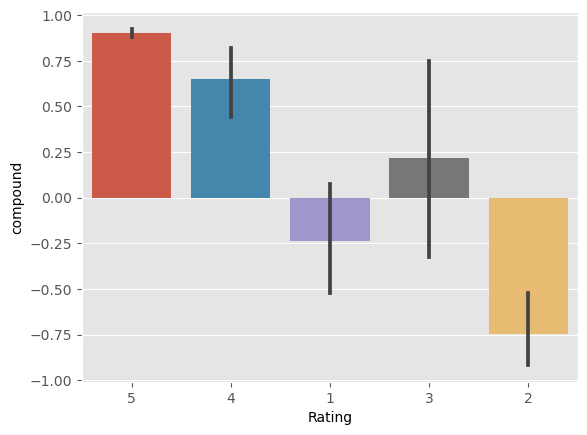

In [33]:
#VADER SENTIMENT SCORING CONTINUATION

sns.barplot(data=vaders, x = 'Rating', y = 'compound')
ax.set_title('Compound score by Ratings.')
plt.show()


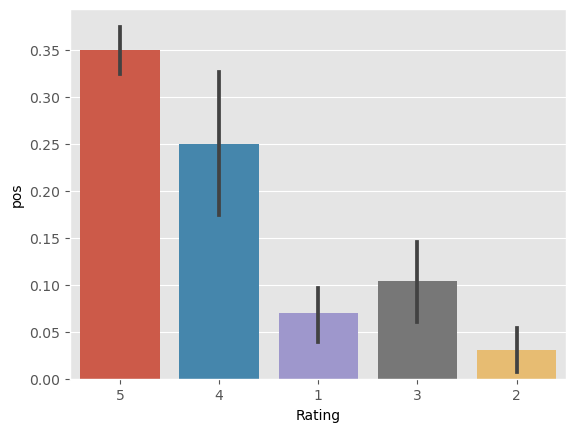

In [34]:
#VADER SENTIMENT SCORING CONTINUATION

sns.barplot(data=vaders, x = 'Rating', y = 'pos')
ax.set_title('Compound score by Ratings.')
plt.show()

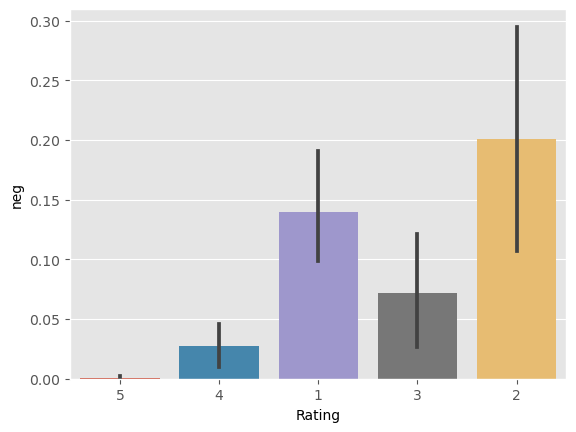

In [35]:
#VADER SENTIMENT SCORING CONTINUATION

sns.barplot(data=vaders, x = 'Rating', y = 'neg')
ax.set_title('Compound score by Ratings.')
plt.show()

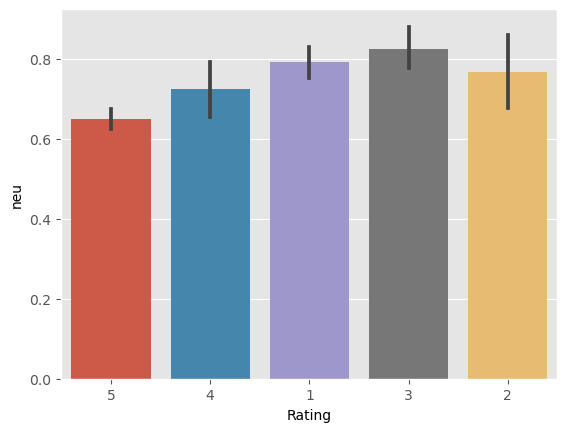

In [36]:
#VADER SENTIMENT SCORING CONTINUATION

sns.barplot(data=vaders, x = 'Rating', y = 'neu')
ax.set_title('Compound score by Ratings.')
plt.show()

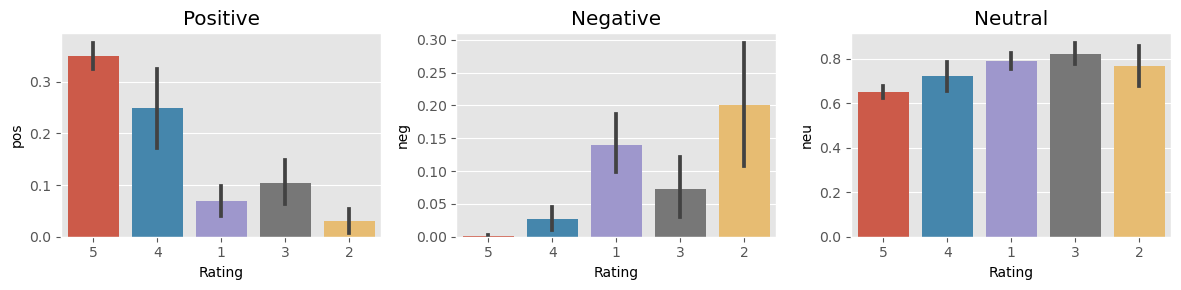

In [37]:
#VADER SENTIMENT SCORING CONTINUATION

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x = 'Rating', y = 'pos', ax = axs[0])
sns.barplot(data=vaders, x = 'Rating', y = 'neg', ax = axs[1])
sns.barplot(data=vaders, x = 'Rating', y = 'neu', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout() #to avoid the overlapping of y axis labels
plt.show()

In [38]:
#ROBERTA PRETRAINED MODEL

#MODEL TRAINED OF A LARGE CORPUS OF DATA
#TRANSFORMER MODEL ACCOUNTS FOR THE WORDS BUT ALSO THE CONTEXT RELATED TO WORDS.
#PICKS UP RELATIONSHIP BETWEEN THE WORDS (SARCASM WAGERA)

#WE WILL USE HUGGING FACE

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [39]:
#ROBERTA PRETRAINED MODEL CONTINUATION

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

#LOADS EVERYTHING FROM A PRETRAINED MODEL
#PULLS DOWN THE MODEL WEIGHTS THAT HAVE BEEN STORED 
#ESSENTIALLY DOING TRANSFER LEARNING
#IT WAS TRAINED ON A BUNCH OF TWITTER COMMENTS THAT WERE LABELED AND WE DONT HAVE TO RETRAIN THE MODEL AT ALL
#WE CAN USE THESE TRAINED WEIGHTS AND APPLY TO OUR DATASETS.
#DOWNLOADS IT ALL WHEN FIRST TIME IS USED 



In [40]:
#ROBERTA PRETRAINED MODEL CONTINUATION

#JUST TO RECALL THE VADER RESULTS ON OUR EXAMPLE
print(example)
sia.polarity_scores(example)

Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service


{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.936}

In [41]:
#ROBERTA PRETRAINED MODEL CONTINUATION

#RUN THE SAME EXAMPLE FOR ROBERTA NOW
encoded_text = tokenizer(example, return_tensors='pt') #TOKENIZER FUNCTION ENCODES THE EXAMPLE
encoded_text

{'input_ids': tensor([[    0, 36376, 11465,    16,   350,   205,    13,    10, 16219,  1559,
             4,  1841,    16,   182, 14302,     4,  3652,    16,   205,     4,
          2306,    70,    10,   205,   676,     4, 13190,  2262,  9938,   111,
           449, 30729,     7,     5,   544,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [42]:
#ROBERTA PRETRAINED MODEL CONTINUATION

output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.3266, -0.2750,  3.1509]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [43]:
#ROBERTA PRETRAINED MODEL CONTINUATION

#CHANGE THE OUTPUT TO A MORE READABLE FORM

changed_output = output[0][0].detach().numpy()
changed_output = softmax(changed_output)
changed_output

#OUTPUT IS IN THE FORM OF NEGATIVE, NEUTRAL, AND POSITIVE RATIO RESPECTIVELY.

array([0.00403153, 0.03136886, 0.96459967], dtype=float32)

In [44]:
#ROBERTA PRETRAINED MODEL CONTINUATION

changed_output_dictionary = {
    'roberta negative' : changed_output[0],
    'roberta_neutral' : changed_output[1], 
    'roberta_positive' : changed_output[2]
}

print(changed_output_dictionary)

{'roberta negative': 0.0040315297, 'roberta_neutral': 0.031368855, 'roberta_positive': 0.96459967}


In [45]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    
    output = model(**encoded_text)
    
    changed_output = output[0][0].detach().numpy()
    
    changed_output = softmax(changed_output)
    
    changed_output_dictionary = {
    'roberta negative' : changed_output[0],
    'roberta_neutral' : changed_output[1], 
    'roberta_positive' : changed_output[2]
    }

    return changed_output_dictionary
    
    

In [46]:
#ALSO ROBERTA MODEL IS VERY SLOW! 10/100 REVIEWS ANALYZED IN 1.5 MINUTES.

vader_result = {}
roberta_result ={}

result = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    rev = row['Review']
    myID = row['Id']
    vader_result = sia.polarity_scores(rev)
    vader_result_rename = {}
    for key, value in vader_result.items(): # rename the neg, pos, neu in vader results to vader_neg, vader_neu etc
        vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(rev)
    both = {**vader_result_rename,**roberta_result}
    result[myID] = both

  0%|          | 0/101 [00:00<?, ?it/s]

In [47]:
vader_result

{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'compound': 0.9693}

In [48]:
roberta_result

{'roberta negative': 0.0014756982,
 'roberta_neutral': 0.007335965,
 'roberta_positive': 0.9911883}

In [49]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.418,
 'vader_pos': 0.582,
 'vader_compound': 0.9693,
 'roberta negative': 0.0014756982,
 'roberta_neutral': 0.007335965,
 'roberta_positive': 0.9911883}

In [53]:
result

{1.0: {'vader_neg': 0.0,
  'vader_neu': 0.582,
  'vader_pos': 0.418,
  'vader_compound': 0.9664,
  'roberta negative': 0.0013910488,
  'roberta_neutral': 0.015603758,
  'roberta_positive': 0.9830052},
 2.0: {'vader_neg': 0.0,
  'vader_neu': 0.554,
  'vader_pos': 0.446,
  'vader_compound': 0.936,
  'roberta negative': 0.0040315297,
  'roberta_neutral': 0.031368855,
  'roberta_positive': 0.96459967},
 3.0: {'vader_neg': 0.0,
  'vader_neu': 0.692,
  'vader_pos': 0.308,
  'vader_compound': 0.9186,
  'roberta negative': 0.0012717044,
  'roberta_neutral': 0.008725556,
  'roberta_positive': 0.99000275},
 4.0: {'vader_neg': 0.0,
  'vader_neu': 0.708,
  'vader_pos': 0.292,
  'vader_compound': 0.8591,
  'roberta negative': 0.0023058604,
  'roberta_neutral': 0.022427095,
  'roberta_positive': 0.975267},
 5.0: {'vader_neg': 0.0,
  'vader_neu': 0.609,
  'vader_pos': 0.391,
  'vader_compound': 0.9201,
  'roberta negative': 0.0013595162,
  'roberta_neutral': 0.009717933,
  'roberta_positive': 0.98892

In [55]:
roberta_pd = pd.DataFrame(result).T
roberta_pd

,vader_neg,vader_neu,vader_pos,vader_compound,roberta negative,roberta_neutral,roberta_positive
1.0,0.000,0.582,0.418,0.9664,0.001391,0.015604,0.983005
2.0,0.000,0.554,0.446,0.9360,0.004032,0.031369,0.964600
3.0,0.000,0.692,0.308,0.9186,0.001272,0.008726,0.990003
4.0,0.000,0.708,0.292,0.8591,0.002306,0.022427,0.975267
5.0,0.000,0.609,0.391,0.9201,0.001360,0.009718,0.988923
...,...,...,...,...,...,...,...
97.0,0.000,0.738,0.262,0.8832,0.002469,0.010396,0.987135
98.0,0.000,0.873,0.127,0.6369,0.016086,0.089486,0.894428
99.0,0.346,0.654,0.000,-0.9137,0.974037,0.023381,0.002582
100.0,0.000,1.000,0.000,0.0000,0.001812,0.015618,0.982569
